In [1]:
import pandas as pd

In [35]:
import os
print(os.getcwd())


C:\Users\goluk


In [37]:
ds= pd.read_csv("C:/Users/goluk/Downloads/sales-data.csv", encoding="ISO-8859-1")

In [39]:
print(ds.head())

   A`        Order ID        Date   Ship Date       Ship Mode Customer ID  \
0   1  CA-2018-152156  11-08-2018  11-11-2018    Second Class    CG-12520   
1   2  CA-2018-152156  11-08-2018  11-11-2018    Second Class    CG-12520   
2   3  CA-2018-138688  06-12-2018  16-06-2018    Second Class    DV-13045   
3   4  US-2017-108966  10-11-2017  18-10-2017  Standard Class    SO-20335   
4   5  US-2017-108966  10-11-2017  18-10-2017  Standard Class    SO-20335   

     Customer Name Customer Segment Country/Region    Customer City  ...  \
0      Claire Gute         Consumer  United States        Henderson  ...   
1      Claire Gute         Consumer  United States        Henderson  ...   
2  Darrin Van Huff        Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell         Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell         Consumer  United States  Fort Lauderdale  ...   

  Region       Product ID         Category Sub-Category  \
0  South  FUR-BO-1000

In [85]:
import pandas as pd

# Load the dataset
# Here ds is used for shortform of dataset
ds= pd.read_csv("C:/Users/goluk/Downloads/sales-data.csv", encoding="ISO-8859-1")

print(ds.head())

# dataset shape
print("Dataset Shape:", ds.shape)

# summary
print(ds.info())

   A`        Order ID        Date   Ship Date       Ship Mode Customer ID  \
0   1  CA-2018-152156  11-08-2018  11-11-2018    Second Class    CG-12520   
1   2  CA-2018-152156  11-08-2018  11-11-2018    Second Class    CG-12520   
2   3  CA-2018-138688  06-12-2018  16-06-2018    Second Class    DV-13045   
3   4  US-2017-108966  10-11-2017  18-10-2017  Standard Class    SO-20335   
4   5  US-2017-108966  10-11-2017  18-10-2017  Standard Class    SO-20335   

     Customer Name Customer Segment Country/Region    Customer City  ...  \
0      Claire Gute         Consumer  United States        Henderson  ...   
1      Claire Gute         Consumer  United States        Henderson  ...   
2  Darrin Van Huff        Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell         Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell         Consumer  United States  Fort Lauderdale  ...   

  Region       Product ID         Category Sub-Category  \
0  South  FUR-BO-1000

In [43]:
ds['Date'] = pd.to_datetime(ds['Date'])
ds['Total Sales'] = ds['Quantity'] * ds['Price']
ds['Month-Year'] = ds['Date'].dt.to_period('M')
ds.drop_duplicates(inplace=True)

In [45]:
print("First 5 rows of the dataset:")
print(ds.head())

print("\nDataset Shape:", ds.shape)

print("\nDataset Info:")
print(ds.info())

First 5 rows of the dataset:
   A`        Order ID       Date   Ship Date       Ship Mode Customer ID  \
0   1  CA-2018-152156 2018-11-08  11-11-2018    Second Class    CG-12520   
1   2  CA-2018-152156 2018-11-08  11-11-2018    Second Class    CG-12520   
2   3  CA-2018-138688 2018-06-12  16-06-2018    Second Class    DV-13045   
3   4  US-2017-108966 2017-10-11  18-10-2017  Standard Class    SO-20335   
4   5  US-2017-108966 2017-10-11  18-10-2017  Standard Class    SO-20335   

     Customer Name Customer Segment Country/Region    Customer City  ...  \
0      Claire Gute         Consumer  United States        Henderson  ...   
1      Claire Gute         Consumer  United States        Henderson  ...   
2  Darrin Van Huff        Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell         Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell         Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture   

In [83]:
# We have to Ensure that 'Date' is in datetime format
ds['Date'] = pd.to_datetime(ds['Date'], errors='coerce')
# Extract month-year as a new column
ds['Month-Year'] = ds['Date'].dt.to_period('M')

In [79]:
monthly_sales = ds.groupby('Month-Year')['Total Sales'].sum()
print(monthly_sales)

Month-Year
2016-01     73744.1250
2016-02     19603.2080
2016-03    302260.8410
2016-04    146422.9970
2016-05    117540.5590
2016-06    170963.4644
2016-07    158392.5590
2016-08    137450.2035
2016-09    417139.7216
2016-10    159024.7310
2016-11    383642.5597
2016-12    392050.0535
2017-01    129297.8524
2017-02     52934.7390
2017-03    199589.6448
2017-04    143593.7465
2017-05    167456.8205
2017-06     96522.2880
2017-07    149333.7270
2017-08    186724.5406
2017-09    334991.3780
2017-10    140458.9335
2017-11    376714.5137
2017-12    407283.1956
2018-01     98322.4030
2018-02    104344.6210
2018-03    237420.0870
2018-04    191368.6990
2018-05    296416.9780
2018-06    185399.3120
2018-07    180687.7030
2018-08    160060.5061
2018-09    346144.0905
2018-10    300826.2590
2018-11    389646.5286
2018-12    559420.1690
2019-01    203832.6220
2019-02     87762.9844
2019-03    251524.6876
2019-04    146195.9259
2019-05    216459.7610
2019-06    267986.1761
2019-07    213810.0420


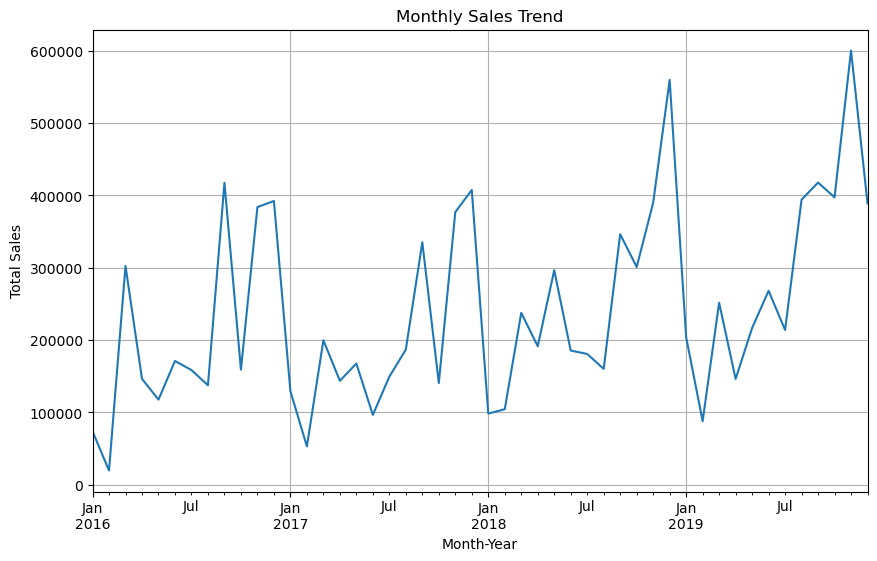

In [77]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10, 6), title="Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [53]:
category_sales = ds.groupby('Category')['Total Sales'].sum()
print(category_sales)

Category
Furniture          3.869167e+06
Office Supplies    3.548585e+06
Technology         4.080262e+06
Name: Total Sales, dtype: float64


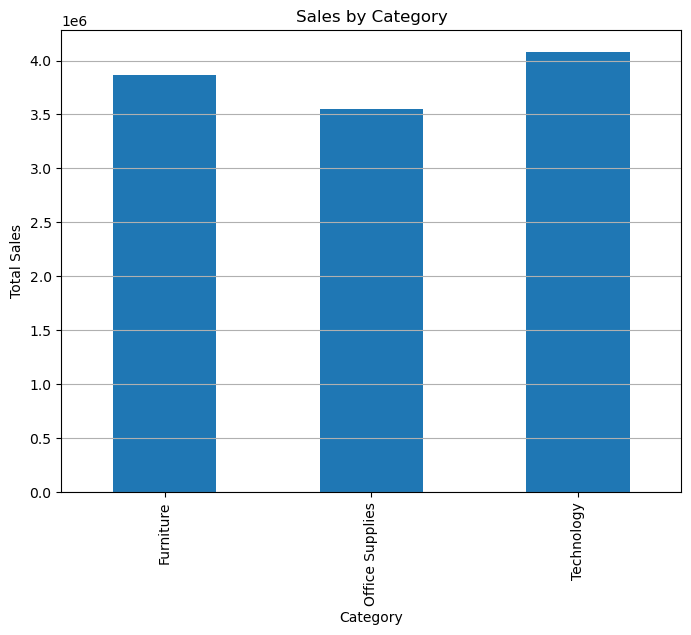

In [55]:
category_sales.plot(kind='bar', figsize=(8, 6), title="Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.grid(axis='y')
plt.show()

In [57]:
top_products = ds.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)

print(top_products)

Product
Canon imageCLASS 2200 Advanced Copier                                          253399.2760
GBC Ibimaster 500 Manual ProClick Binding System                               171524.8920
Cisco TelePresence System EX90 Videoconferencing Unit                          135830.8800
HON 5400 Series Task Chairs for Big and Tall                                   124494.0480
Samsung Galaxy Mega 6.3                                                        118101.1880
Hewlett Packard LaserJet 3310 Copier                                           111478.1420
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    100662.4080
Lexmark MX611dhe Monochrome Laser Printer                                       93329.4510
3D Systems Cube Printer, 2nd Generation, Magenta                                84499.3500
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish                   81561.1284
Name: Total Sales, dtype: float64


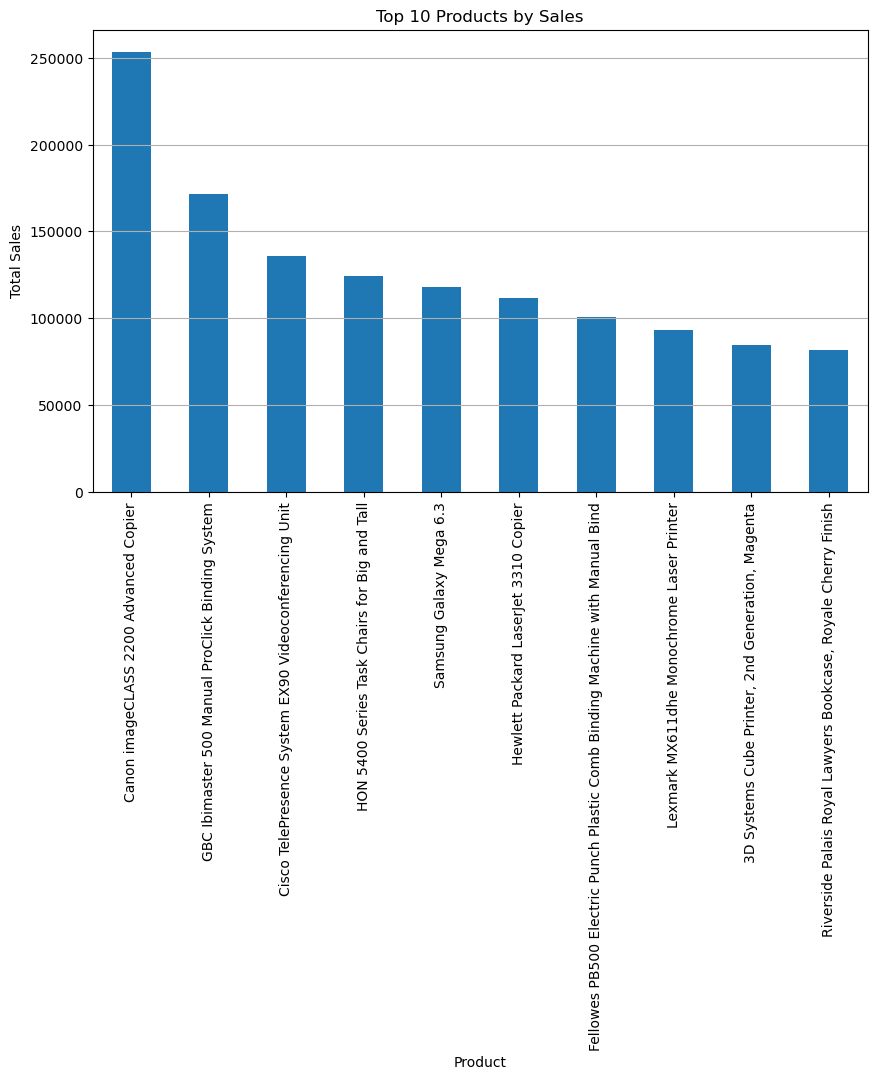

In [59]:
top_products.plot(kind='bar', figsize=(10, 6), title="Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.grid(axis='y')
plt.show()

In [61]:
bottom_products = ds.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).tail(10)

print(bottom_products)

Product
Acco Economy Flexible Poly Round Ring Binder                                  17.748
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum    16.872
Xerox 1989                                                                    15.936
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink               15.600
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                            15.400
Boston 1900 Electric Pencil Sharpener                                         14.980
Grip Seal Envelopes                                                           14.144
Avery 5                                                                       11.520
Xerox 20                                                                       6.480
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac               3.248
Name: Total Sales, dtype: float64


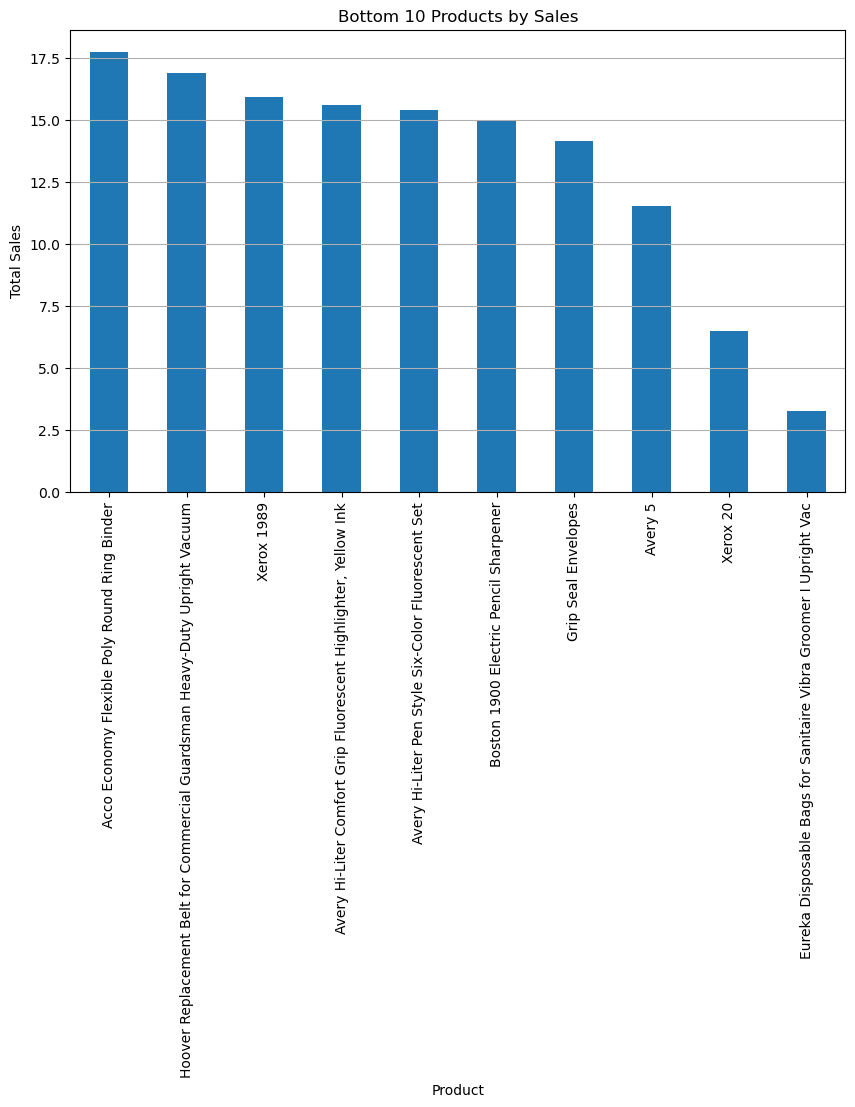

In [63]:
bottom_products.plot(kind='bar', figsize=(10, 6), title="Bottom 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.grid(axis='y')
plt.show()

C:\Users\goluk\AppData\Local\Temp\ipykernel_22000\3242954270.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


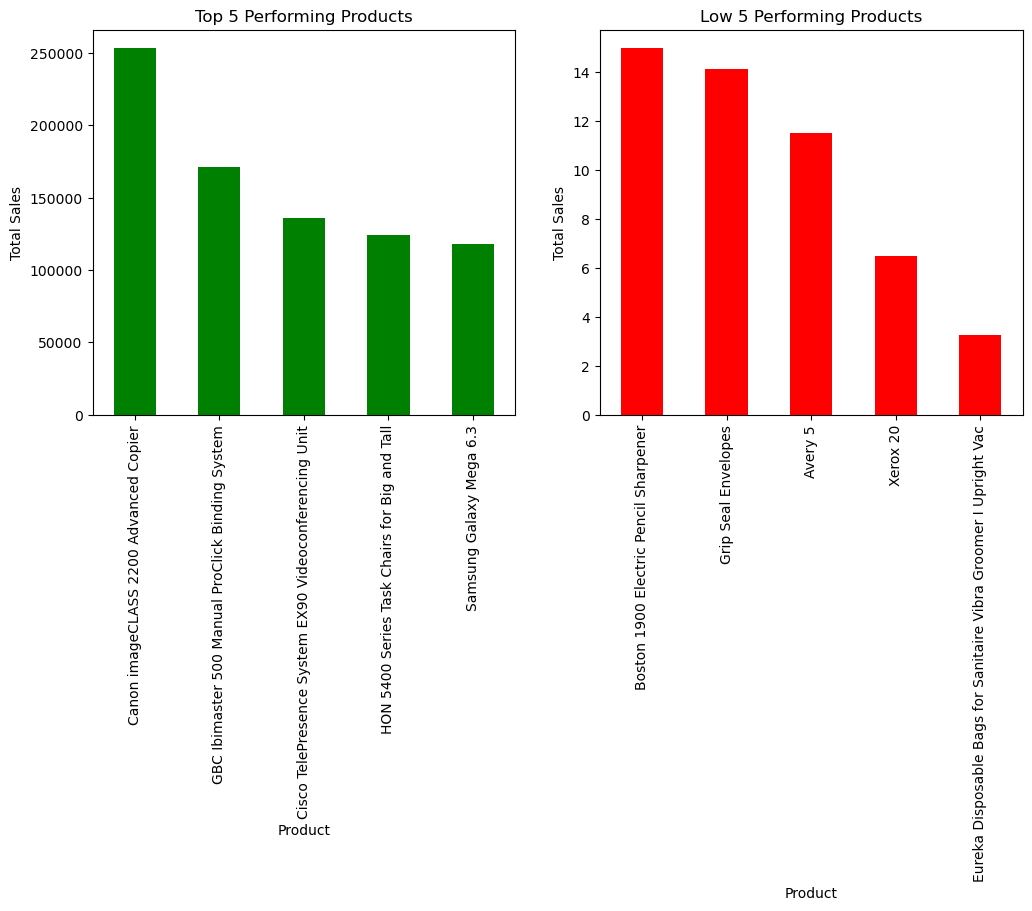

In [73]:
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
top_products = product_sales.head(5)
low_products = product_sales.tail(5)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
top_products.plot(kind='bar', color='green')
plt.title('Top 5 Performing Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
low_products.plot(kind='bar', color='red')
plt.title('Low 5 Performing Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [65]:
state_orders = ds['State'].value_counts()
state_orders

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

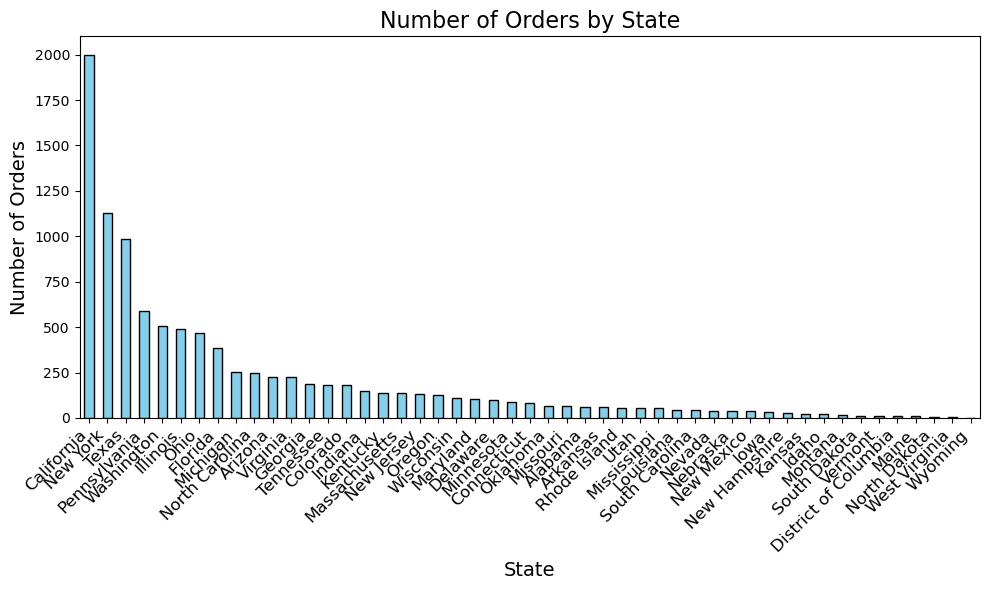

In [67]:
state_orders = ds['State'].value_counts()

plt.figure(figsize=(10, 6))
state_orders.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Orders by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()

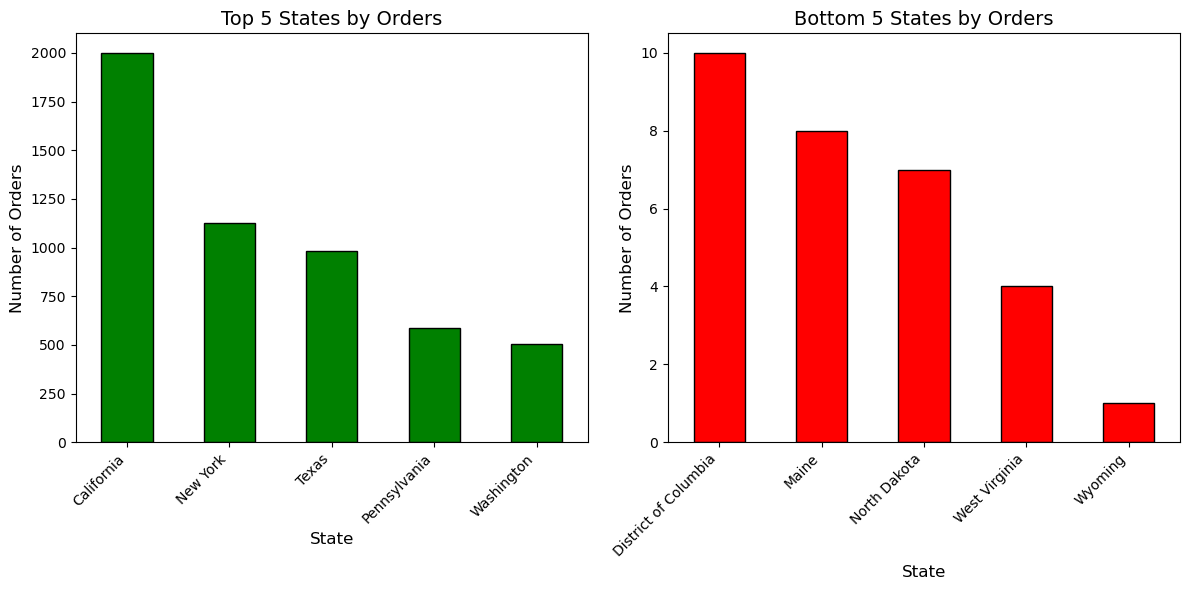

In [75]:
state_orders = ds['State'].value_counts()

# top 5 and bottom 5 states
top_5_states = state_orders.head(5)
bottom_5_states = state_orders.tail(5)

# Plot the top 5 states
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
top_5_states.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 5 States by Orders', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Plot the bottom 5 states
plt.subplot(1, 2, 2) 
bottom_5_states.plot(kind='bar', color='red', edgecolor='black')
plt.title('Bottom 5 States by Orders', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

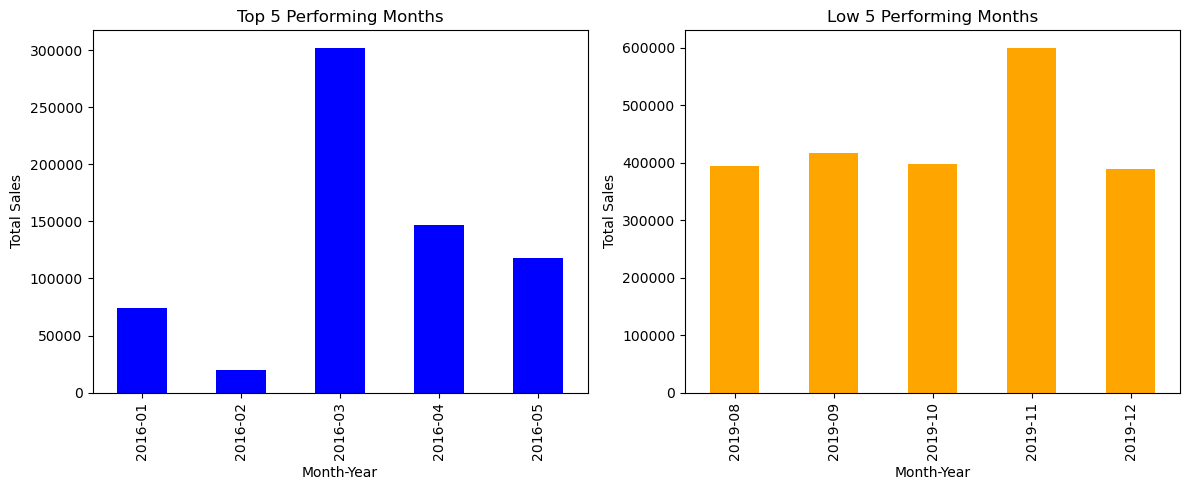

In [71]:
monthly_sales = ds.groupby('Month-Year')['Total Sales'].sum()
peak_months = monthly_sales.head(5)
low_months = monthly_sales.tail(5)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
peak_months.plot(kind='bar', color='blue')
plt.title('Top 5 Performing Months')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
low_months.plot(kind='bar', color='orange')
plt.title('Low 5 Performing Months')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [19]:
print(ds.columns)


Index(['A`', 'Order ID', 'Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Customer Segment', 'Country/Region', 'Customer City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product', 'Price', 'Quantity', 'Discount', 'Profit',
       'Unnamed: 21'],
      dtype='object')


In [ ]:
'''1.Data Loading (Load raw data for processing.)
  pd.read_csv('file.csv')- Load data from a CSV file into a DataFrame.

2.Data Cleaning (Ensure data consistency and prepare it for analysis.)
  pd.to_datetime(ds['Date'], errors='coerce')- Convert the 'Date' column to datetime format. Invalid entries are set as `NaT`.
  ds.dropna(subset=['Date'])- Remove rows with missing or invalid values in the 'Date' column.
  ds.drop_duplicates(inplace=True)- Remove duplicate rows from the DataFrame.
  ds['Total Sales'] = ds['Quantity'] * ds['Price']- Create a new column for total sales by multiplying quantity and price.
  ds['Month-Year'] = ds['Date'].dt.to_period('M')- Extract the month and year from the 'Date' column for grouping sales.

3.Data Analysis (Extract meaningful insights from the data.)
  ds.groupby('Product')['Total Sales'].sum()- Calculate total sales for each product.
  ds.groupby('Month-Year')['Total Sales'].sum()- Calculate total sales for each month and year.
  .sort_values(ascending=False)- Sort values in descending order to identify top-performing entries.
  .head(n)- Display the top `n` rows (e.g., top 5 months or products).
  .tail(n)- Display the bottom `n` rows (e.g., low 5 months or products).

4.Data Visualization (Communicate insights effectively using visual tools.)
  plt.plot(x, y, marker='o')- Plot a line graph for visualizing trends (e.g., monthly sales).
  plt.bar(x, y)- Create a bar chart to compare categories (e.g., product-wise sales).
  plt.title('Title')- Add a title to the graph.
  plt.xlabel('Label')- Label the x-axis.
  plt.ylabel('Label')- Label the y-axis.
  plt.xticks(rotation=angle)- Rotate x-axis labels for better readability.
  plt.show()- Display the plotted graph.

5.Debugging/Validation ( Verify that the data and transformations are accurate.)
  print(ds.columns)- Display all column names to verify the structure of the DataFrame.
  print(ds[['Date', 'Month-Year']].head())- Check the first few rows of specific columns for validation.
  ds.isnull().sum()- Check for missing values in each column.'''